In [1]:
import os

In [2]:
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np

In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
IMG_HEIGHT = 320
IMG_WIDTH = 320

In [5]:
model = tf.keras.models.load_model('new_model')

In [6]:
K.set_learning_phase(0)

In [7]:
model.save('new_model/my_model.h5')

In [24]:
img = np.random.randn(1,320,320,3).astype(np.float32)

In [25]:
%%timeit
out = model.predict(img)

110 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
def mask_garbage(fpath, show=True, save=False, out_path='', resize=True):
    img = cv2.imread(fpath)
    if resize:
        img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
    img = img/255
    pred = model.predict(np.expand_dims(img,0)).squeeze()
    mask = np.zeros(img.shape[:2], dtype=np.float32)
    y_grid = img.shape[0]//pred.shape[0]
    x_grid = img.shape[1]//pred.shape[1]
    idy = 0
    for y in range(0, img.shape[0], y_grid):
        idx = 0
        for x in range(0, img.shape[1], x_grid):
            try:
                mask[y:y+y_grid, x:x+x_grid] = pred[idy, idx]
            except IndexError:
                pass
            idx+=1
        idy+=1
    fig = plt.figure(figsize=(8, 8), frameon=False)
    plt.imshow(img)
    plt.imshow(mask, alpha=0.2)#, cmap='PuRd')
    if save:
        fnm = fp.split('/')[-1].split('.')[0]
        plt.savefig(out_path + fnm + '.png', bbox_inches='tight', pad_inches=0)
    if show:
        plt.show()
    plt.close(fig)

In [10]:
DIR = '../spotgarbage-GINI/spotgarbage/garbage-queried-images/'

In [ ]:
for fp in os.listdir(DIR)[30:60]:
    mask_garbage(DIR+fp, show=True, save=False, resize=True)

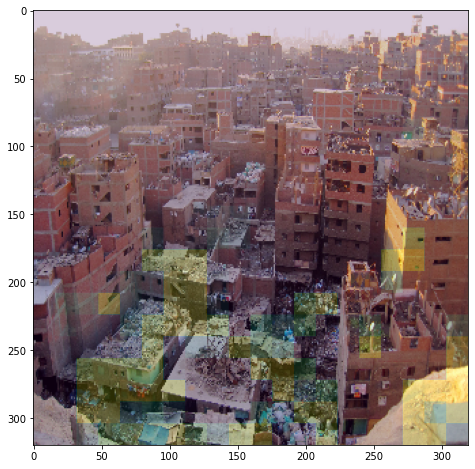

In [12]:
mask_garbage(DIR+'3adba2c8-6799-11e5-8dc4-40f2e96c8ad8.jpg', show=True)

In [ ]:
nn = cv2.dnn.readNet()